In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## step1의 다른버전 (복습 + $\alpha$)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-22-regression.csv") 

In [4]:
# 분석을 위해 df -> tensor로 변환
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
X= torch.tensor([[1]*100,x]).T

### ver1: net = torch.nn.Linear(1,1,bias=True) 

`-` step1: yhat

In [39]:
net = torch.nn.Linear(1,1)
net.weight.data, net.bias.data

(tensor([[0.7372]]), tensor([0.7776]))

In [40]:
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([[-5.0]])                         
net.weight.data, net.bias.data

(tensor([[10.]]), tensor([[-5.]]))

In [41]:
yhat = net(x)

`-` step2: loss 

In [42]:
loss = torch.mean((y-yhat)**2)
loss
# 아니면
loss_fn = torch.nn.MSELoss()
loss = loss_fn(y,yhat); loss

tensor(85.8769, grad_fn=<MseLossBackward0>)

`-` step3: 미분 

In [43]:
# 미분 전 상황
net.weight, net.bias

(Parameter containing:
 tensor([[10.]], requires_grad=True),
 Parameter containing:
 tensor([[-5.]], requires_grad=True))

In [44]:
net.weight.grad, net.bias.grad
# 아직 미분안 했으니 미분계수 값이 저장되어 있지 않음

(None, None)

(미분)

In [45]:
loss.backward()  
# 미분과정의 다른 ver은 없다

(미분후상황)

In [46]:
net.weight.grad, net.bias.grad
# net 사용 안 하면 What.grad.data 혹은 What.grad로 미분값 확인 할 수 있음
# 미분 값 활용하여 What값 수정해줄 땐 What.grad가 아닌 What.grad.data를 이용해줘야 함

(tensor([[11.8893]]), tensor([[-13.4225]]))

`-` step4: update 

In [47]:
net.weight.data = net.weight.data - 1/10 * net.weight.grad 
net.bias.data = net.bias.data - 1/10 * net.bias.grad

In [48]:
net.weight.data,net.bias.data

(tensor([[8.8111]]), tensor([[-3.6577]]))

`-` 반복 

(code before)

In [49]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True) 
# requires_grad = True는 net 생성해서 yhat만들 땐 안 해줘도 됨

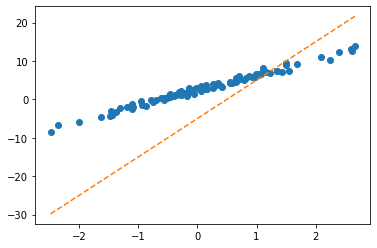

In [50]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [51]:
for epoc in range(30):
    ## step1 
    yhat = X@What     
    ## step2
    loss = torch.mean((y-yhat)**2) 
    ## step3 
    loss.backward()
    ## step4 
    What.data = What.data - 1/10 * What.grad # SSE가 아니라 MSE를 구했기 때문에 학습률을 1/10으로 설정.
    What.grad = None # 미분값이 누적되지 않고, 계속 초기화시켜주는 것

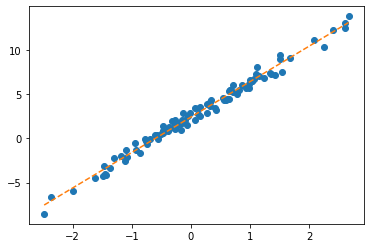

In [52]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

(code after) 

In [53]:
net = torch.nn.Linear(1,1)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0]) 

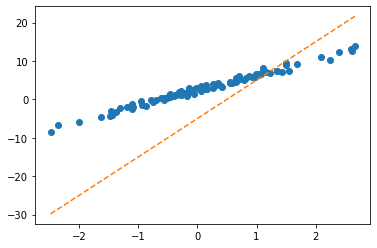

In [54]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [58]:
for epoc in range(30):
    yhat = net(x)
    loss_fn = torch.nn.MSELoss() 
    loss = loss_fn(y,yhat)
    
    # ############## 주의 ##############
    # torch.nn.MSELoss(y,yhat)
    # 이렇게 사용하면 error
    # 이게 귀찮으면 그냥 직접 수식 써서 
    # y,yhat넣어서 계산해줘도 되고..
    # #################################
    loss.backward()
    
    
    ## step4 (이게 엄청 귀찮아짐) 
    net.weight.data = net.weight.data - 1/10 * net.weight.grad 
    net.bias.data = net.bias.data - 1/10 * net.bias.grad
    net.weight.grad = None 
    net.bias.grad = None 
    
    # net 생성해서 yhat 만들 때 말고 그냥 What 사용했을 떈, requires_grad = True도 해줘야되고,
    # 청소는 What.grad = None 한 번만 해주면 된다.  ****

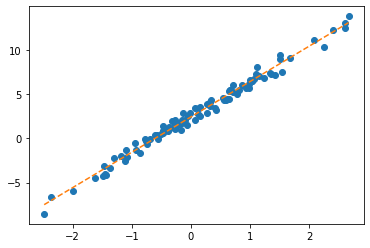

In [59]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

In [70]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]]) 

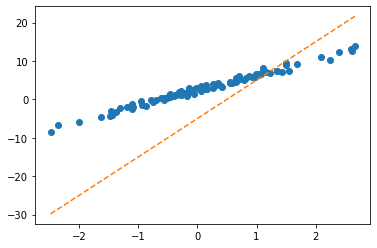

In [71]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [72]:
for epoc in range(30): 
    yhat = net(X) 
    loss = torch.mean((y-yhat)**2)
    loss.backward() 
    net.weight.data = net.weight.data - 1/10 * net.weight.grad
    net.weight.grad = None

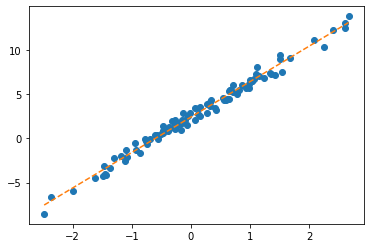

In [73]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--') 

## step4의 다른버전: 옵티마이저!

`-` 준비 

In [74]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

> ### 옵티마이저 생성

In [77]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 
# 이때 SGD말고, 성능이 더 좋은 Adam을 사용할 수 있다. 

`-` step1~3

In [86]:
yhat = net(x)     
loss = torch.mean((y-yhat)**2) 
loss.backward() 

(update) 

In [87]:
optimizr.step() 
optimizr.zero_grad() 

(update 후) 

In [88]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

(tensor([[7.8612]]), tensor([[-2.5548]]))

In [89]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

(tensor([[0.]]), tensor([[0.]]))

`-` 반복 

In [90]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [91]:
for epoc in range(30): 
    yhat = net(x)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

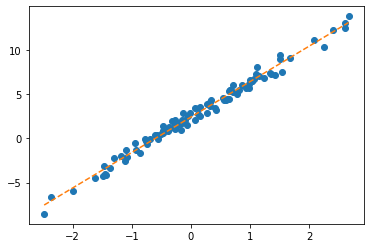

In [92]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

In [93]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [94]:
for epoc in range(30): 
    yhat = net(X)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

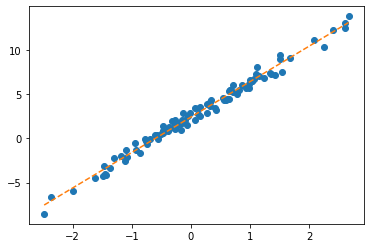

In [95]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

--- 

## Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요 
- https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html, 클래스공부 8단계 참고 


`-` 탐구시작: 네트워크 생성 

In [93]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [94]:
net.bias

Parameter containing:
tensor([0.8670], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이 되어있음 

```
params (iterable): iterable of parameters to optimize or dicts defining
        parameter groups
```

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음 (iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를 의미)

In [95]:
set(dir(net.parameters)) & {'__iter__'}

set()

In [96]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미? 

In [97]:
_generator = net.parameters()

In [98]:
_generator.__next__()

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [99]:
_generator.__next__()

Parameter containing:
tensor([0.8670], requires_grad=True)

In [100]:
_generator.__next__()

StopIteration: 

`-` 이건 이런느낌인데? 

In [101]:
_generator2 = iter([net.weight,net.bias])

In [102]:
_generator2

In [103]:
_generator2.__next__()

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [104]:
_generator2.__next__()

Parameter containing:
tensor([0.8670], requires_grad=True)

In [105]:
_generator2.__next__()

StopIteration: 

`-` 즉 아래는 같은코드이다. 

```python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아 리스트(iterable object)로 만드는 함수라 이해할 수 있다. 

`-` 응용예제1

In [106]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

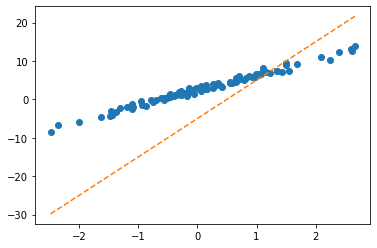

In [107]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [108]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

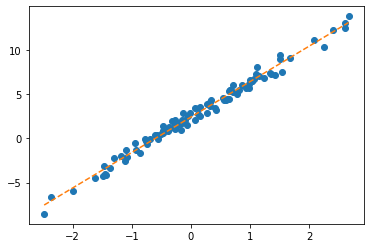

In [109]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [110]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

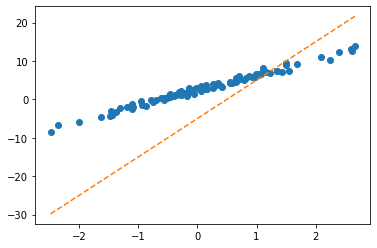

In [111]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [112]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

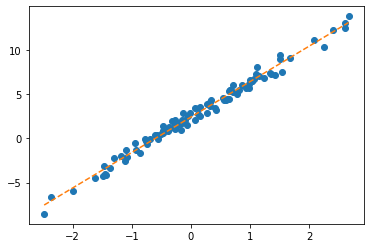

In [113]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

---

---

---

## Logistic regression 

`-` 현실에서 이런 경우가 많음 
- $x$가 커질수록 성공확률이 증가함. 
- $x$가 작아질수록 성공확률이 증가함. 

`-` (X,y)는 어떤모양? 

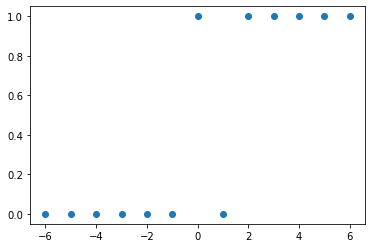

In [96]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음 

In [97]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))
f = lambda x : torch.exp(x)/(1+torch.exp(x))

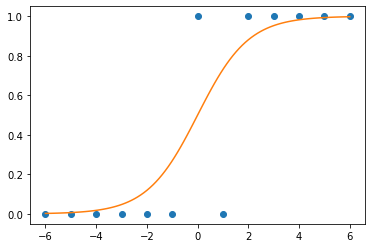

In [98]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))

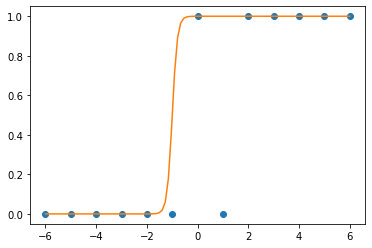

In [100]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(10*xx+10))

### model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음 <--- 외우세요!!!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 

- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!

`-` 예제시작 

In [103]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= - 1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=π_i, 즉 확률을 의미함
y = torch.bernoulli(v) 

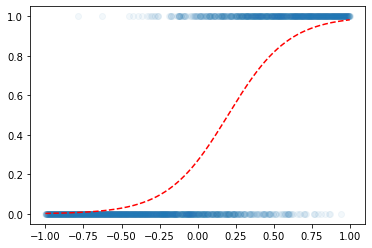

In [104]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r') # true.....

- 우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는 mapping을 학습해보자. 

### net 설계 

`-` 최초곡선 

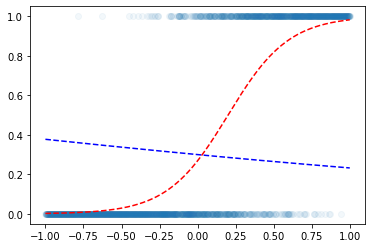

In [105]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,f(x*w1hat+w0hat),'--b')

`-` f 대신에 torch.nn.Sigmoid() 사용해서 함수만들어도 무방 

In [106]:
a1 = torch.nn.Sigmoid()

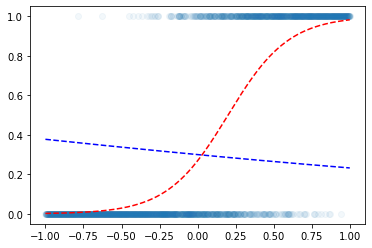

In [107]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,a1(x*w1hat+w0hat),'--b')

`-` x*w1hat + w0hat 대신에 torch.nn.Linear() 로 써도 무방 

In [108]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(1,1)

In [109]:
l1.weight

Parameter containing:
tensor([[-0.3467]], requires_grad=True)

In [110]:
l1.bias

Parameter containing:
tensor([-0.8470], requires_grad=True)

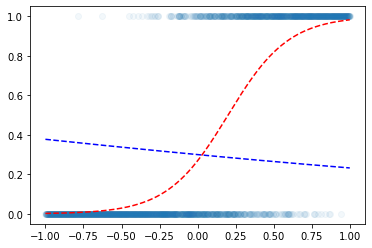

In [111]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,a1(l1(x)).data,'--b')

`-` 지금 $x \overset{l1}{\to} u \overset{a1}{\to} v = \hat{y}$ 구조임 

`-` l1,a1 을 sequential 하게 (직렬로) 엮어서 $ x \overset{net}{\to} \hat{y}$ 로 만들수 없을까? 

In [112]:
net = torch.nn.Sequential(l1,a1) 

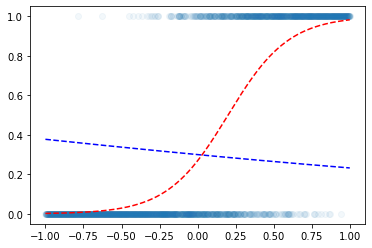

In [113]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

### 학습

`-` 이제 옵티마이저 설계하고 학습하자. 

In [114]:
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

`-` step1~4 

(1000번 학습)

In [115]:
for epoc in range(1000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## loss가 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

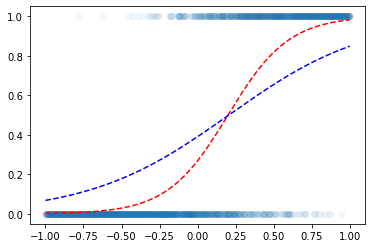

In [116]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r') # 정답값
plt.plot(x,net(x).data,'--b')

(5000번 추가학습)

In [117]:
for epoc in range(5000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

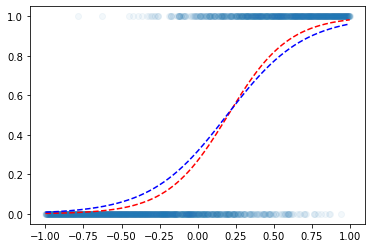

In [118]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

---

In [119]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= -1
w1= 5
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함
y = torch.bernoulli(v) 

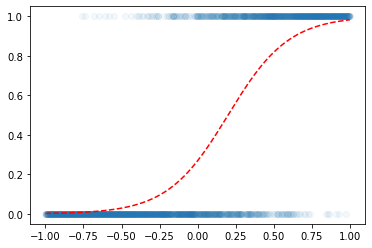

In [121]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')

- 우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는 mapping을 학습해보자. 
- 그 후, 새로운 data가 들어오면 학습된 빨간 선 mapping을 이용해 이진분류를 할 수 있게 된다

---

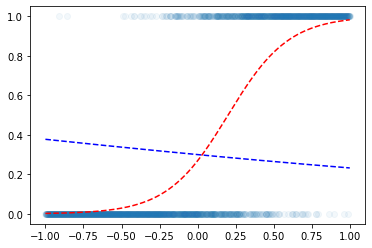

In [9]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,f(x*w1hat+w0hat),'--b')

In [10]:
a1 = torch.nn.Sigmoid()

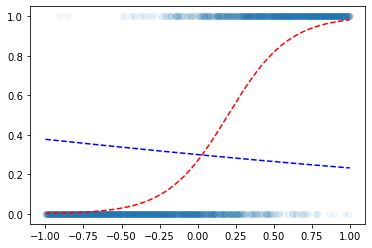

In [11]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,a1(x*w1hat+w0hat),'--b')

In [12]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(1,1)

In [13]:
l1.weight,l1.bias

(Parameter containing:
 tensor([[-0.3467]], requires_grad=True),
 Parameter containing:
 tensor([-0.8470], requires_grad=True))

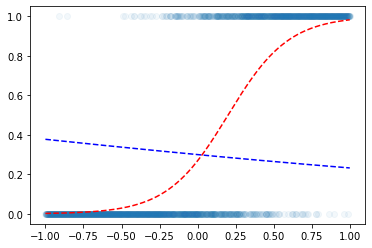

In [15]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,a1(l1(x)).data,'--b')

`-` 지금 $x \overset{l1}{\to} u \overset{a1}{\to} v = \hat{y}$ 구조임 

`-` l1,a1 을 sequential 하게 (직렬로) 엮어서 $ x \overset{net}{\to} \hat{y}$ 로 만들수 없을까? 

In [16]:
net = torch.nn.Sequential(l1,a1) 

In [17]:
net

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

In [18]:
net[0]

Linear(in_features=1, out_features=1, bias=True)

In [19]:
net[0] == l1

True

In [20]:
net[0](x) == l1(x)

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

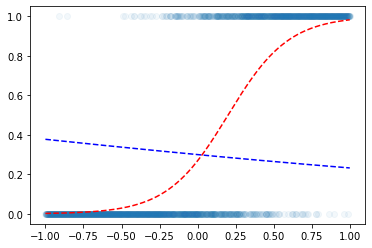

In [21]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

---

### 학습

`-` 이제 옵티마이저 설계하고 학습하자. 

In [22]:
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

`-` step1~4 

(1000번 학습)

In [25]:
for epoc in range(1000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## loss가 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

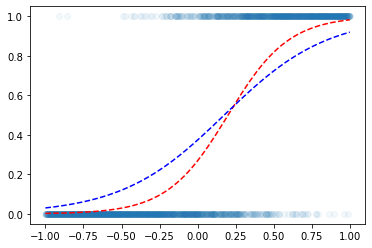

In [26]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

(5000번 추가학습)

In [27]:
for epoc in range(5000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

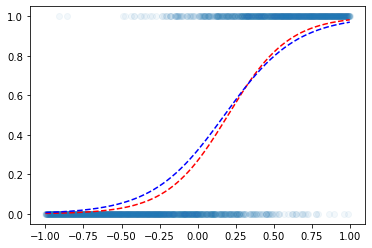

In [28]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

### MSE loss 와 BCE loss 의 비교

In [122]:
def loss_fn1(y,yhat): 
    return torch.mean((y-yhat)**2)

In [123]:
def loss_fn2(y,yhat):
    return -torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

`-` loss_fn1(MSE), SGD, lr=0.05

In [124]:
torch.manual_seed(43052) 
net = torch.nn.Sequential(torch.nn.Linear(1,1),torch.nn.Sigmoid()) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

for epoc in range(1000): 
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn1(y,yhat)# MSE
    ## step3
    loss.backward() 
    ## step4 
    optimizr.step()
    optimizr.zero_grad() 

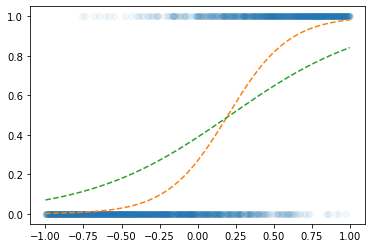

In [125]:
plt.plot(x,y,'o',alpha=0.05)
plt.plot(x,v,'--')
plt.plot(x,net(x).data,'--')

`-` loss_fn2(BCE), SGD, lr=0.05

In [126]:
torch.manual_seed(43052) 
net = torch.nn.Sequential(torch.nn.Linear(1,1),torch.nn.Sigmoid()) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 
for epoc in range(1000): 
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn2(y,yhat)
    ## step3
    loss.backward() 
    ## step4 
    optimizr.step()
    optimizr.zero_grad() 

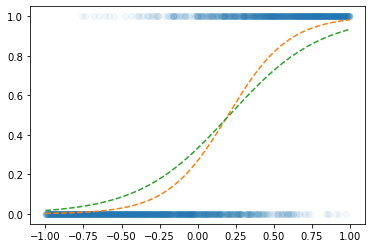

In [127]:
plt.plot(x,y,'o',alpha=0.05)
plt.plot(x,v,'--')
plt.plot(x,net(x).data,'--')

!! loss_fn2 로 하니까 더 잘맞는다? 

`-` 손실함수의 모양이 다르다.. 

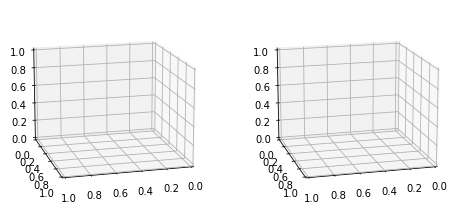

In [36]:
fig = plt.figure()
ax1=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2,projection='3d')
ax1.elev=15;ax2.elev=15;ax1.azim=75;ax2.azim=75
fig.set_figheight(8)
fig.set_figwidth(8)

In [37]:
def plot_loss(loss_fn,ax):
    w0hat,w1hat =torch.meshgrid(torch.arange(-10,3,0.15),torch.arange(-1,10,0.15),indexing='ij')
    w0hat = w0hat.reshape(-1)
    w1hat = w1hat.reshape(-1)
    def l(w0hat,w1hat):
        yhat = torch.exp(w0hat+w1hat*x)/(1+torch.exp(w0hat+w1hat*x))
        return loss_fn(y,yhat) 
    loss = list(map(l,w0hat,w1hat))
    ax.scatter(w0hat,w1hat,loss,s=0.1,alpha=0.2) 
    ax.scatter(-1,5,l(-1,5),s=200,marker='*') # 실제로 -1,5에서 최소값을 가지는건 아님.. 

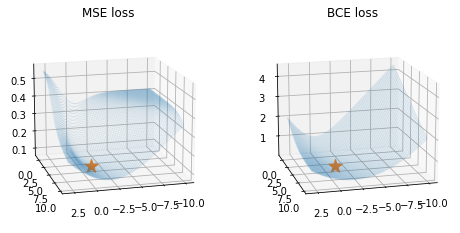

In [38]:
plot_loss(loss_fn1,ax1)
plot_loss(loss_fn2,ax2)
ax1.set_title('MSE loss')
ax2.set_title('BCE loss')
fig

- 왼쪽 그림은 손실함수가 convex 하지 않다.
- 오른쪽 그림은 손실함수가 convex(2차곡선과 유사) 하다. 

### 시각화를 위한 준비함수들 

**준비1: for문 대신 돌려주고 epoch마다 필요한 정보를 기록하는 함수를 만들자!**

In [39]:
def learn_and_record(net, loss_fn, optimizr):
    yhat_history = [] 
    loss_history = []
    what_history = [] 

    for epoc in range(10000): 
        ## step1 
        yhat = net(x)
        ## step2 
        loss = loss_fn(y,yhat)
        ## step3
        loss.backward() 
        ## step4 
        optimizr.step()
        optimizr.zero_grad() 

        ## record 
        if epoc % 20 ==0: 
            yhat_history.append(yhat.reshape(-1).data.tolist())
            loss_history.append(loss.item())
            what_history.append([net[0].bias.data.item(), net[0].weight.data.item()])
    return yhat_history, loss_history, what_history

**준비2: 애니메이션을 만들어주는 함수를 만들자!**

In [40]:
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

In [41]:
def show_lrpr2(net,loss_fn,optimizr,suptitle=''):
    yhat_history,loss_history,what_history = learn_and_record(net,loss_fn,optimizr)
    
    fig = plt.figure(figsize=(7,2.5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.set_xticks([]);ax1.set_yticks([])
    ax2.set_xticks([]);ax2.set_yticks([]);ax2.set_zticks([])
    ax2.elev = 15; ax2.azim = 75

    ## ax1: 왼쪽그림 
    ax1.plot(x,v,'--')
    ax1.scatter(x,y,alpha=0.05)
    line, = ax1.plot(x,yhat_history[0],'--') 
    plot_loss(loss_fn,ax2)
    fig.suptitle(suptitle)
    fig.tight_layout()

    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(what_history)[epoc,0],np.array(what_history)[epoc,1],loss_history[epoc],color='grey')
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

### 시각화1: MSE loss, SGD, 좋은초기값

In [42]:
l1 = torch.nn.Linear(1,1)
a1 = torch.nn.Sigmoid()
net = torch.nn.Sequential(l1,a1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

In [43]:
l1.bias.data = torch.tensor([-3.0])
l1.weight.data = torch.tensor([[-1.0]])

In [44]:
show_lrpr2(net,loss_fn1,optimizr,'MSEloss, SGD, good_init')

### 시각화2: BCE loss, SGD, 좋은초기값

In [45]:
l1 = torch.nn.Linear(1,1)
a1 = torch.nn.Sigmoid()
net = torch.nn.Sequential(l1,a1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

In [46]:
l1.bias.data = torch.tensor([-3.0])
l1.weight.data = torch.tensor([[-1.0]])

In [47]:
show_lrpr2(net,loss_fn2,optimizr)

### 시각화3: MSE loss, SGD, 나쁜초기값
- 매우 안 움직임
- 시각화4 : 같은 초깃값인데 손실함수만 BCE를 사용해줌

In [48]:
l1 = torch.nn.Linear(1,1)
a1 = torch.nn.Sigmoid()
net = torch.nn.Sequential(l1,a1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

In [49]:
l1.bias.data = torch.tensor([-10.0])
l1.weight.data = torch.tensor([[-1.0]])

In [50]:
show_lrpr2(net,loss_fn1,optimizr)

### 시각화4: BCE loss, SGD, 나쁜초기값 (?)

In [51]:
l1 = torch.nn.Linear(1,1)
a1 = torch.nn.Sigmoid()
net = torch.nn.Sequential(l1,a1) 
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

In [52]:
l1.bias.data = torch.tensor([-10.0])
l1.weight.data = torch.tensor([[-1.0]])

In [53]:
show_lrpr2(net,loss_fn2,optimizr)

---

## 숙제

`-` 시각화1~4에서 optimizer를 Adam으로 설정하고 돌려볼 것

(hint) 시각화1의 경우 아래와 같이 코드를 수정하면 된다. 

### 시각화1: MSE loss, `ADAM`, 좋은초기값

In [54]:
l1 = torch.nn.Linear(1,1)
a1 = torch.nn.Sigmoid()
net = torch.nn.Sequential(l1,a1) 
optimizr = torch.optim.Adam(net.parameters(),lr=0.05) 

In [55]:
l1.bias.data = torch.tensor([-3.0])
l1.weight.data = torch.tensor([[-1.0]])

In [56]:
show_lrpr2(net,loss_fn1,optimizr,'MSEloss, ADAM, good_init')